In [63]:
import json
import os
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from drug_named_entity_recognition import find_drugs

In [64]:
folder_location = os.path.join("documents", "Black-or-African-American")
b_docs = []
w_docs = []
for filename in os.listdir(folder_location):
    file_location = os.path.join(folder_location, filename)
    if os.path.isfile(file_location):
        with open(file_location) as d:
            file_contents = d.read()
            try:
                content = json.loads(file_contents)
                b_docs.append(content)
            except Exception as e:
                try:
                    # pull of first and last line, gpt sometimes respons with a leading ```json and ends with ```
                    tmp = file_contents.splitlines(True)
                    tmp = tmp[1:-1]
                    tmp = "".join(tmp)
                    content = json.loads(tmp)
                    b_docs.append(content)
                except Exception as e:
                    print(f"{file_location} Error: {e}")
                pass

folder_location = os.path.join("documents", "White-or-Caucasian")
for filename in os.listdir(folder_location):
    file_location = os.path.join(folder_location, filename)
    if os.path.isfile(file_location):
        with open(file_location) as d:
            try:
                file_contents = d.read()
                content = json.loads(file_contents)
                w_docs.append(content)
            except Exception as e:
                try:
                    # pull of first and last line, gpt sometimes respons with a leading ```json and ends with ```
                    tmp = file_contents.splitlines(True)
                    tmp = tmp[1:-1]
                    tmp = "".join(tmp)
                    content = json.loads(tmp)
                    w_docs.append(content)
                except Exception as e:
                    print(f"{file_location} Error: {e}")
                pass

documents/Black-or-African-American/gpt-3.5-turbo-0613_Black-or-African-American_1689743594_cSYNpzjdnjptzQPuN5mfdc.txt Error: Expecting ',' delimiter: line 21 column 1 (char 1884)
documents/Black-or-African-American/gpt-3.5-turbo-0613_Black-or-African-American_1689741535_MB7qsjKCtsXzMJ6B8kJWdD.txt Error: Extra data: line 1 column 17 (char 16)
documents/Black-or-African-American/gpt-3.5-turbo-0613_Black-or-African-American_1689741092_9EHmzmczehJnvM7ttfot4Q.txt Error: Extra data: line 1 column 17 (char 16)
documents/Black-or-African-American/gpt-3.5-turbo-0613_Black-or-African-American_1689744960_jzwsFCbaEvgZANMDveieTh.txt Error: Extra data: line 1 column 17 (char 16)
documents/Black-or-African-American/gpt-3.5-turbo-0613_Black-or-African-American_1689744984_ZNHWdNGLPhS8WWTuB7xjVw.txt Error: Extra data: line 1 column 17 (char 16)
documents/Black-or-African-American/gpt-3.5-turbo-0613_Black-or-African-American_1689743457_QK4n2iRtzVz2KKwucorjdm.txt Error: Extra data: line 1 column 17 (char

In [65]:
print(len(b_docs))
print(len(w_docs))

4968
4956


In [66]:
b_normalized_medications = []
for doc in b_docs:
    if doc.get("medications") is not None:
        res = []
        res = doc.get("medications").split(" ")
        try:
            res.remove("other")
        except ValueError:            
            pass
        res = find_drugs(res, is_ignore_case=True)
        # if len(res) > 0 and True in list(map(lambda x: x[0].get("name").lower() == "ciclosporin", res)):
        #     print(doc.get("medications"))
        #     for index in list(map(lambda x: x[1], res)):
        #         # print(doc.get("medications").split(" ")[index])
        #         print(res)
        b_normalized_medications.append(res)
len(b_normalized_medications)

4961

In [67]:
b_normalized_medications[0]

[({'name': 'Amlodipine',
   'synonyms': {'Amlodipine',
    'Amlodipino',
    'Amlodipinum',
    'Amlodis',
    'Amlor',
    'Amvaz',
    'Astudal',
    'Istin',
    'Norvasc'},
   'medline_plus_id': 'a692044',
   'nhs_url': 'https://www.nhs.uk/medicines/amlodipine',
   'wikipedia_url': 'https://en.wikipedia.org/wiki/Amlodipine',
   'mesh_id': 'D014665',
   'drugbank_id': 'DB00381'},
  0,
  0)]

In [68]:
w_normalized_medications = []
for doc in w_docs:
    if doc.get("medications") is not None:
        res = []
        res = doc.get("medications").split(" ")
        try:
            res.remove("other")
        except ValueError:
            pass
        res = find_drugs(res, is_ignore_case=True)
        w_normalized_medications.append(res)
len(w_normalized_medications)

4953

In [69]:
b_just_names = list(
    map(lambda n: list(map(lambda m: m[0].get("name"), n)), b_normalized_medications)
)
b_normalized_medications_names = [
    element for sublist in b_just_names for element in sublist
]
w_just_names = list(
    map(lambda n: list(map(lambda m: m[0].get("name"), n)), w_normalized_medications)
)
w_normalized_medications_names = [
    element for sublist in w_just_names for element in sublist
]
# print(len(b_normalized_medications_names))
# print(len(w_normalized_medications_names))

In [70]:
b_cv = CountVectorizer(analyzer="word")
b_cv_fit = b_cv.fit_transform(b_normalized_medications_names)
b_word_list = b_cv.get_feature_names_out()
b_count_list = b_cv_fit.toarray().sum(axis=0)

b_word_freq = dict(zip(b_word_list, b_count_list))


w_cv = CountVectorizer(analyzer="word")
w_cv_fit = w_cv.fit_transform(w_normalized_medications_names)
w_word_list = w_cv.get_feature_names_out()
w_count_list = w_cv_fit.toarray().sum(axis=0)

w_word_freq = dict(zip(w_word_list, w_count_list))

In [71]:
b_word_freq_df = pd.DataFrame(
    b_word_freq.items(), columns=["word", "b.frequency"]
).sort_values(by="b.frequency", ascending=False)
w_word_freq_df = pd.DataFrame(
    w_word_freq.items(), columns=["word", "w.frequency"]
).sort_values(by="w.frequency", ascending=False)

In [72]:
wf_df = w_word_freq_df.merge(b_word_freq_df, how="inner", on="word")

In [73]:
wf_df["w.frequency_pct"] = wf_df["w.frequency"] / wf_df["w.frequency"].sum()
wf_df["b.frequency_pct"] = wf_df["b.frequency"] / wf_df["b.frequency"].sum()
wf_df["frequency_pct_diff"] = wf_df["b.frequency_pct"] - wf_df["w.frequency_pct"]
wf_df["frequency_pct_diff_abs"] = wf_df["frequency_pct_diff"].abs()
# Sort by largest values in absolue difference
wf_df.sort_values(by="frequency_pct_diff", ascending=False).head(10)

,word,w.frequency,b.frequency,w.frequency_pct,b.frequency_pct,frequency_pct_diff,frequency_pct_diff_abs
8,metformin,85,121,0.013862,0.019323,0.005461,0.005461
4,metoprolol,248,279,0.040444,0.044554,0.004111,0.004111
0,lisinopril,2444,2503,0.398565,0.399713,0.001148,0.001148
7,losartan,99,105,0.016145,0.016768,0.000623,0.000623
16,levothyroxine,5,9,0.000815,0.001437,0.000622,0.000622
3,simvastatin,397,409,0.064742,0.065315,0.000572,0.000572
11,atenolol,20,23,0.003262,0.003673,0.000411,0.000411
10,hydrochlorothiazide,37,40,0.006034,0.006388,0.000354,0.000354
24,naproxen,1,3,0.000163,0.000479,0.000316,0.000316
22,rosuvastatin,3,5,0.000489,0.000798,0.000309,0.000309


In [74]:
# First order frequencies by magnature of difference (absolute value), take the top 200 words with the greatest difference,
# then re-sort by actual difference so when we plot the values will be sequential from smallest to largest bars
most = (
    wf_df.sort_values(by="frequency_pct_diff_abs", ascending=False)
    .head(200)
    .sort_values(by="frequency_pct_diff", ascending=False)
)

chart_data = {}

# Create a map with the word as the frequency, and the magnitude vector as the value\
# a vector of [0, n] will plot a blue bar
# a vector of [n, 0] will plot an orange bar
# a vector with a negative n [-n, 0] will plot a bar on the left
# a vector with a positive n [n, 0] will plot a bar on the right
# {"word": [-1, 0]} will plot an orange bar for "word" on the left of 0 with length 1
# {"word": [0, 0.5]} will plot a blue bar for "word" on the right of 0 with length 0.5
# in order to generate a good Positive Negative bar chart, we assign b freq to the left side (negative)
# and w freq to the right side (positive)
for row in most.iterrows():
    if row[1]["w.frequency_pct"] > row[1]["b.frequency_pct"]:
        # orange bars
        chart_data[row[1]["word"]] = [
            row[1]["w.frequency_pct"] - row[1]["b.frequency_pct"],
            0,
        ]
    else:
        # blue bars
        chart_data[row[1]["word"]] = [
            0,
            -(row[1]["b.frequency_pct"] - row[1]["w.frequency_pct"]),
        ]

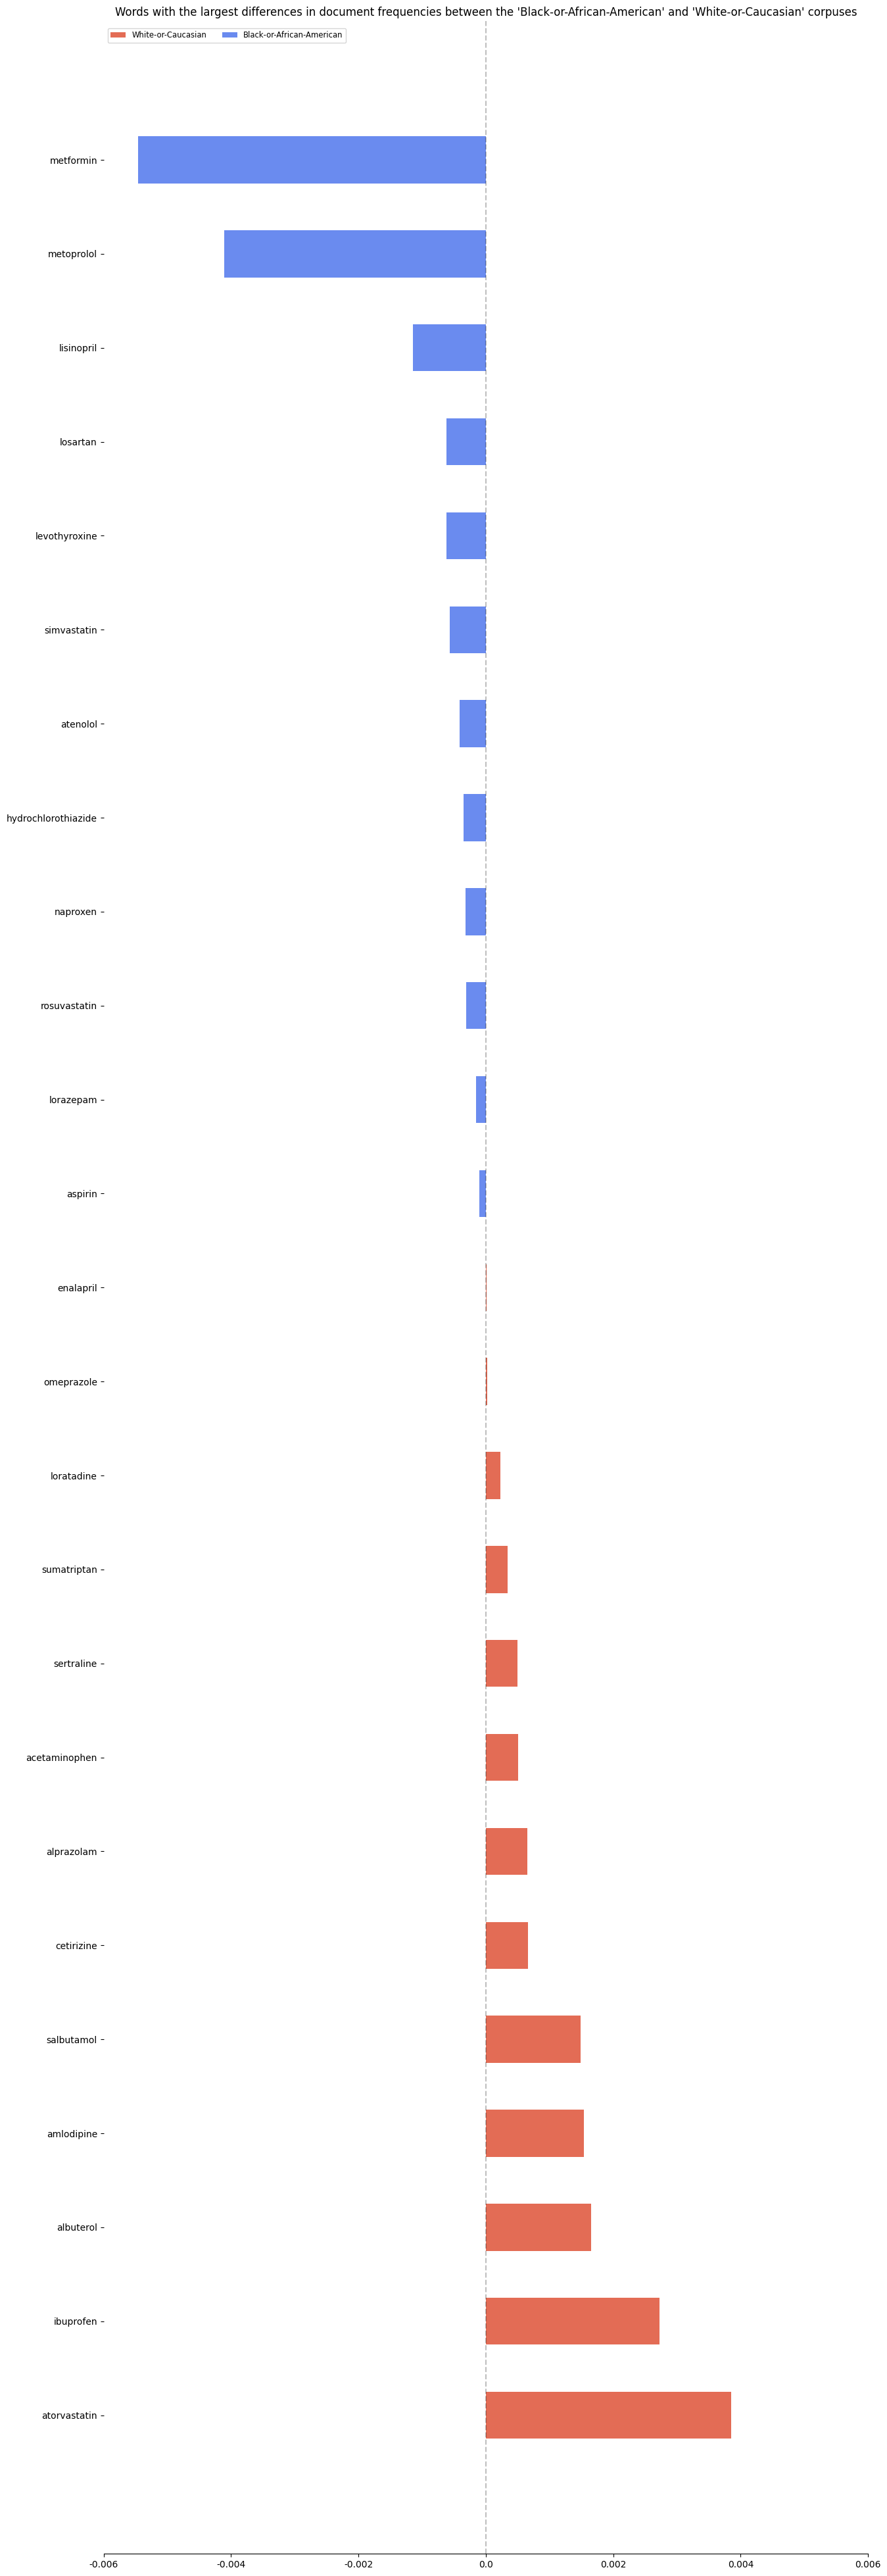

In [75]:
# Positive Negative Bar Chart to better visualize where word frequencies diverge between data sets
# Based on https://stackoverflow.com/a/69976552/11407943
import numpy as np
import matplotlib.pyplot as plt


category_names = ["White-or-Caucasian", "Black-or-African-American"]
results = chart_data


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*. The order is assumed
        to be from 'Strongly disagree' to 'Strongly aisagree'
    category_names : list of str
        The category labels.
    """

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    middle_index = data.shape[1] // 2
    offsets = 0  # data[:, range(middle_index)].sum(axis=1) # + data[:, middle_index]/2

    # Color Mapping
    category_colors = plt.get_cmap("coolwarm_r")(np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(15, 50))

    # Plot Bars
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths - offsets
        rects = ax.barh(
            labels, widths, left=starts, height=0.5, label=colname, color=color
        )

    # Add Zero Reference Line
    ax.axvline(0, linestyle="--", color="black", alpha=0.25)

    # X Axis
    ax.set_xlim(-0.006, 0.006)
    # ax.set_xticks(np.arange(-0.0035, 0.0035, 0.003))
    ax.xaxis.set_major_formatter(lambda x, pos: str(x))

    # Y Axis
    ax.invert_yaxis()

    # Remove spines
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Ledgend
    ax.legend(
        ncol=len(category_names),
        bbox_to_anchor=(0, 0.99),
        loc="lower left",
        fontsize="small",
    )

    # Set Background Color
    fig.set_facecolor("#FFFFFF")

    return fig, ax


fig, ax = survey(results, category_names)
plt.title(
    "Words with the largest differences in document frequencies between the 'Black-or-African-American' and 'White-or-Caucasian' corpuses"
)
plt.show()

In [76]:
import scipy
from sklearn.feature_extraction import text
from collections import Counter

In [77]:
b_just_names_lower = [list(map(lambda x: x.lower(), arr)) for arr in b_just_names]
b_list_of_doc_counter = list(map(Counter, b_just_names_lower))
# element for sublist in w_just_names for element in sublist
w_just_names_lower = [list(map(lambda x: x.lower(), arr)) for arr in w_just_names]
w_list_of_doc_counter = list(map(Counter, w_just_names_lower))
b_just_names_lower
b_medications_names_counter = Counter([
    element for sublist in b_just_names_lower for element in sublist
])
w_medications_names_counter = Counter([
    element for sublist in w_just_names_lower for element in sublist
])

In [78]:
b_medications_names_counter

Counter({'lisinopril': 2503,
         'atorvastatin': 2005,
         'amlodipine': 455,
         'simvastatin': 409,
         'metoprolol': 279,
         'metformin': 121,
         'losartan': 105,
         'albuterol': 103,
         'salbutamol': 103,
         'hydrochlorothiazide': 40,
         'ibuprofen': 35,
         'atenolol': 23,
         'loratadine': 19,
         'aspirin': 17,
         'levothyroxine': 9,
         'acetaminophen': 6,
         'rosuvastatin': 5,
         'omeprazole': 5,
         'cetirizine': 4,
         'enalapril': 4,
         'lorazepam': 3,
         'naproxen': 3,
         'sumatriptan': 3,
         'sertraline': 2,
         'alprazolam': 1})

In [79]:
w_medications_names_counter

Counter({'lisinopril': 2444,
         'atorvastatin': 1987,
         'amlodipine': 455,
         'simvastatin': 397,
         'metoprolol': 248,
         'albuterol': 111,
         'salbutamol': 110,
         'losartan': 99,
         'metformin': 85,
         'ibuprofen': 51,
         'hydrochlorothiazide': 37,
         'atenolol': 20,
         'loratadine': 20,
         'aspirin': 16,
         'acetaminophen': 9,
         'cetirizine': 8,
         'alprazolam': 5,
         'levothyroxine': 5,
         'sumatriptan': 5,
         'omeprazole': 5,
         'sertraline': 5,
         'enalapril': 4,
         'rosuvastatin': 3,
         'lorazepam': 2,
         'serotonin': 1,
         'benazepril': 1,
         'naproxen': 1,
         'diazepam': 1})

In [80]:
total_keys = list(set(list(w_medications_names_counter.keys()) + list(b_medications_names_counter.keys())))
new_counts = {}
aa = []
ca = []
for k in total_keys:
    # [aa,ca]
    new_counts[k] = [b_medications_names_counter.get(k,0),w_medications_names_counter.get(k,0)]
    aa.append(b_medications_names_counter.get(k,0))
    ca.append(w_medications_names_counter.get(k,0))

c_table = pd.DataFrame.from_dict(new_counts)
c_table



,sertraline,atorvastatin,alprazolam,simvastatin,acetaminophen,losartan,loratadine,ibuprofen,rosuvastatin,levothyroxine,...,enalapril,amlodipine,cetirizine,albuterol,naproxen,omeprazole,aspirin,lisinopril,metoprolol,atenolol
0,2,2005,1,409,6,105,19,35,5,9,...,4,455,4,103,3,5,17,2503,279,23
1,5,1987,5,397,9,99,20,51,3,5,...,4,455,8,111,1,5,16,2444,248,20


In [81]:
class bcolors:
    HEADER = "\033[95m"
    OKBLUE = "\033[94m"
    OKCYAN = "\033[96m"
    OKGREEN = "\033[92m"
    WARNING = "\033[93m"
    FAIL = "\033[91m"
    ENDC = "\033[0m"
    BOLD = "\033[1m"
    UNDERLINE = "\033[4m"

In [82]:
# Chi square independence test
# https://www.dir.uniupo.it/pluginfile.php/138296/mod_resource/content/0/22-colloc-bw.pdf
for k in list(set(total_keys)):
    # try:
    # For AA [Number of instances of current word, Number of instances of all other words]
    x1 =[c_table[k].iloc[0], c_table.iloc[0].sum() - c_table[k].iloc[0]]
    # For CA [Number of instances of current word, Number of instances of all other words]
    y1 =[c_table[k].iloc[1], c_table.iloc[1].sum() - c_table[k].iloc[1]]
    print(f'Word: {k}')
    print(f'AA: {x1}')
    print(f'CA: {y1}')
    test = scipy.stats.chi2_contingency([x1,y1])
    word = c_table[k].name
    if test.pvalue < 0.01:
        print(
            f'There is a significant difference in the frequency of the word {word} with a p-value of {bcolors.OKGREEN + "{:0.3f}".format(test.pvalue) + bcolors.ENDC}'
            + bcolors.ENDC
        )
        sig_count = sig_count + 1
    elif test.pvalue < 0.05:
        print(
            f'There is a significant difference in the frequency of the word {word} with a p-value of {bcolors.OKGREEN +"{:0.3f}".format(test.pvalue) + bcolors.ENDC}'
        )
        sig_count = sig_count + 1
    else:
        print(
            f'There was no significant difference in the frequency of the word {word} with a p-value of {"{:0.3f}".format(test.pvalue)}'
        )  
    print(f'')



Word: sertraline
AA: [2, 6260]
CA: [5, 6130]
There was no significant difference in the frequency of the word sertraline with a p-value of 0.433

Word: atorvastatin
AA: [2005, 4257]
CA: [1987, 4148]
There was no significant difference in the frequency of the word atorvastatin with a p-value of 0.674

Word: alprazolam
AA: [1, 6261]
CA: [5, 6130]
There was no significant difference in the frequency of the word alprazolam with a p-value of 0.211

Word: simvastatin
AA: [409, 5853]
CA: [397, 5738]
There was no significant difference in the frequency of the word simvastatin with a p-value of 0.920

Word: acetaminophen
AA: [6, 6256]
CA: [9, 6126]
There was no significant difference in the frequency of the word acetaminophen with a p-value of 0.578

Word: losartan
AA: [105, 6157]
CA: [99, 6036]
There was no significant difference in the frequency of the word losartan with a p-value of 0.837

Word: loratadine
AA: [19, 6243]
CA: [20, 6115]
There was no significant difference in the frequency of 

Word: metformin
AA: [121, 6141]
CA: [85, 6050]
There is a significant difference in the frequency of the word metformin with a p-value of 0.021